In [1]:
import tensorflow as tf
import numpy as np
from keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow import keras

import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import math
tf.random.set_seed(0)
np.random.seed(0)

In [2]:
# Load Dataset
train_ds = tf.data.Dataset.load('../datasets/train_ds')
validation_ds = tf.data.Dataset.load('../datasets/test_ds')

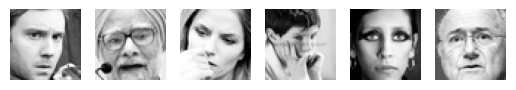

In [3]:
# Display images before augmentation
plt_iter = train_ds.as_numpy_iterator()
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(next(plt_iter)[0], cmap = cm.Greys_r)
    plt.axis('off')
plt.show()

Sequence consisting of transformations done by keras image augmentation layers

In [4]:
train_aug = keras.Sequential([
	layers.Rescaling(scale=1.0 / 255),
	layers.RandomFlip("horizontal"),
	layers.RandomZoom(
		height_factor=(-0.05, -0.15),
		width_factor=(-0.05, -0.15)),
	layers.RandomRotation(0.05),
    layers.RandomContrast(0.2)
])
validation_aug = keras.Sequential([
	layers.Rescaling(scale=1.0 / 255)
])

Mapping sequence of augmentations onto their respective dataset

In [5]:
train_ds = (
	train_ds
	.batch(64)
	.map(lambda x, y: (train_aug(x), y),
		 num_parallel_calls=tf.data.AUTOTUNE)
	.prefetch(tf.data.AUTOTUNE)
)
validation_ds = (
	validation_ds
	.batch(64)
	.map(lambda x, y: (validation_aug(x), y),
		 num_parallel_calls=tf.data.AUTOTUNE)
	.prefetch(tf.data.AUTOTUNE)
)

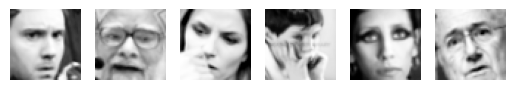

In [6]:
# display images after augmentation
plt_iter = next(train_ds.as_numpy_iterator())
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(plt_iter[0][i], cmap = cm.Greys_r)
    plt.axis('off')
plt.show()

In [7]:
# Save augmented dataset
train_ds.save('../datasets/augmented_train_ds')
validation_ds.save('../datasets/augmented_validation_ds')